In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [3]:
cd ../..

 Volume in drive C has no label.
 Volume Serial Number is 540F-2F75

 Directory of c:\Users\Rory\Desktop\projects\expenditure_prox\notebooks\modelling

04-Oct-21  09:50 PM    <DIR>          .
04-Oct-21  09:50 PM    <DIR>          ..
26-Sep-21  07:04 PM           626,316 db_scan_all_categories.ipynb
02-Oct-21  05:37 PM           409,776 DBscan_3f_all_cats_good_results.ipynb
10-Oct-21  01:33 PM           156,963 dbscan_FINAL.ipynb
02-Oct-21  07:44 PM           242,403 dbscan_grid_searching.ipynb
04-Oct-21  09:49 PM           115,969 dbscan_grid_searching_changing_features.ipynb
02-Oct-21  06:58 PM           386,836 gmm_f3_all_cats.ipynb
04-Oct-21  09:15 PM           123,942 kde_all_categs.ipynb
10-Oct-21  01:38 PM           247,677 laptops.ipynb
22-Sep-21  10:49 PM           200,369 laptops_2clusters(old).ipynb
02-Oct-21  06:58 PM           645,026 laptops_3clusters_new.ipynb
04-Oct-21  10:26 PM           440,453 laptops_4clusters.ipynb
26-Sep-21  12:25 PM           502,412 phones_4clust

## Reading in data and preproc

In [2]:
df = pd.read_json('C:\\Users\\Administrator\\expenditure_prox\\laptops.json')

ValueError: Expected object or value

In [ ]:
import preproc
from join_data import join_y
df = join_y(df, 'laptops_sales.csv')
df = preproc.clean_cols(df)
df = preproc.fill_empty_lists(df)
df = preproc.preprocess_reviews(df)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Administrator\expenditure_prox\preproc.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_preproc'] = df['review_text'].apply(lambda x: __remove_accented_chars(x))
C:\Users\Administrator\expenditure_prox\preproc.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [82]:
df.head(2)


,product_name,price,urls,remotekey,shelf_order,item_category,no_reviews,recommendation_percent,review_date,review_rating,review_text,review_title,summary_star_rating,code,TOTAL_SALES,text_preproc,text_preproc2
0,hp 14in ryzen 3 4gb 128gb fhd laptop black,399.99,https://www.argos.co.uk/product/9200856?clickP...,9200856,2,[Includes Microsoft 365 Personal and 1TB OneDr...,17,100,"[30 July 2021, 30 July 2021, 21 July 2021, 8 J...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",[Easy to set up and navigate. Nice and slim an...,"[Love my new HP laptop, Easy to use, Great lap...",4.9,3313337993733739104503754749411541515033011334...,1810,"[[easy, to, set, up, and, navigate, nice, and,...","[[easy, set, navigate, nice, slim, light, carr..."
1,asus e410 14in celeron 4gb 64gb cloudbook blue,249.99,https://www.argos.co.uk/product/9219854?clickP...,9219854,3,"[Life is all about finding the right balance, ...",41,95,"[30 July 2021, 1 June 2021, 7 May 2021, 14 Apr...","[4, 4, 5, 5, 5, 5, 5, 1, 5, 4, 5, 5, 5, 5, 5, ...",[I bought this a month ago and it does work as...,"[Works perfectly, Small and very good, Charges...",4.6,6574575681413832019281349545653225568312928234...,2780,"[[i, bought, this, a, month, ago, and, it, doe...","[[bought, month, ago, work, advertised, joy, u..."


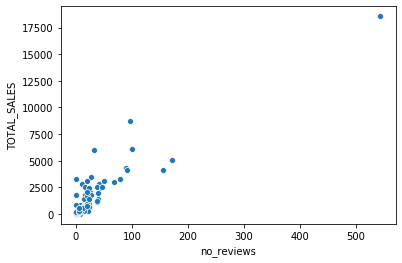

In [83]:
import seaborn as sns
sns.scatterplot(x=df['no_reviews'], y=df['TOTAL_SALES'])

## Visualsing data

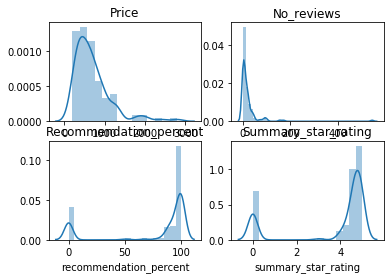

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
dfc = df[['remotekey','price','no_reviews','recommendation_percent','summary_star_rating','TOTAL_SALES']]

f, axes = plt.subplots(2, 2)
sns.distplot(dfc['price'],hist=True, ax = axes[0][0])
axes[0][0].set_title('Price')
sns.distplot(dfc['no_reviews'],hist=True, ax = axes[0][1])
axes[0][1].set_title('No_reviews')
sns.distplot(dfc['recommendation_percent'],hist=True, ax = axes[1][0])
axes[1][0].set_title('Recommendation_percent')
sns.distplot(dfc['summary_star_rating'],hist=True, ax = axes[1][1])
axes[1][1].set_title('Summary_star_rating')
dfc = dfc[['remotekey','price','no_reviews','TOTAL_SALES']]        

## Scaling

In [268]:
from sklearn.preprocessing import StandardScaler
dfs = dfc[['price','no_reviews']]  
scaler = StandardScaler()
dfs = scaler.fit_transform(dfs)

## Kmeans

In [218]:
from sklearn.cluster import KMeans
#without scaler dfn=dfc.drop('remotekey',axis=1).to_numpy()
X=dfs
km = KMeans(
    n_clusters=4, init='random',
    n_init=1000, max_iter=1000, 
    tol=1e-06, random_state=2
)
y_km = km.fit_predict(X)
dfc['km_cluster'] = pd.Series(y_km, index=dfc.index)


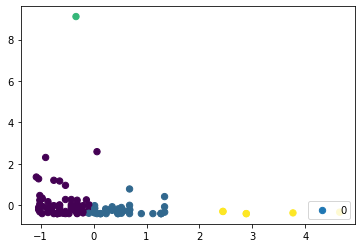

In [219]:
#kmeans = KMeans(n_init=20, max_iter=1000, n_clusters=3,algorithm='full').fit(X)
#k_result = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_km, s=40, cmap='viridis')
plt.legend(y_km, loc=4)

In [206]:
#dfc.sort_values('TOTAL_SALES', ascending=False)

**The clustering is done primarly from price, desktops less than £1000 = cluster 2
desktops £1000-£2000 = cluster 1, and then more are 0.**

## Visualising weights

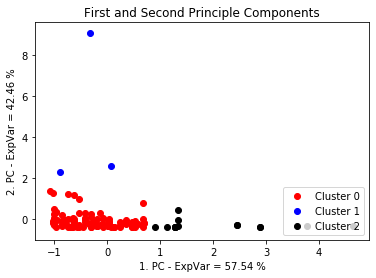

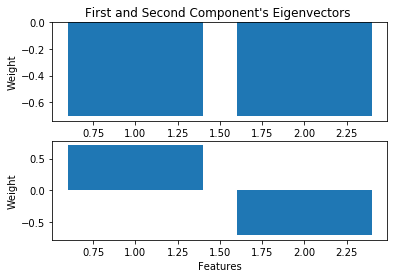

In [221]:
from eigencluster import show_results

show_results(X,2,4)

In [54]:
dfc.columns

Index(['remotekey', 'price', 'no_reviews', 'TOTAL_SALES', 'km_cluster'], dtype='object')

**If my interpretation is correct then the primary component is equally balanced between both features and so is the second. Now I should adjust weights to get better results.**

##  Weighting the algorithm

In [264]:
dfs[0]

array([-0.63931797, -0.10493894])

In [265]:
X = dfs
Xw = X
Xw[:,[1]] *=1.2
Xw[:,[0]] *= -1

In [266]:
Xw[0]

array([ 0.63931797, -0.12592673])

### The number of reviews column has no been multipled by 1.2

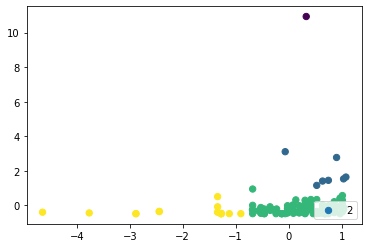

In [267]:
kmw = KMeans(
    n_clusters=4, init='random',
    n_init=1000, max_iter=1000, 
    tol=1e-06, random_state=3
)
wy_km = kmw.fit_predict(Xw)
dfc['kmw_cluster'] = pd.Series(wy_km, index=dfc.index)
plt.scatter(Xw[:, 0], Xw[:, 1], c=wy_km, s=40, cmap='viridis')
plt.legend(wy_km, loc=4)

In [258]:
#dfc.sort_values('TOTAL_SALES', ascending=False)

In [278]:
dfc['quants'] = pd.qcut(df['TOTAL_SALES'],4,['3','2','1','0'])
dfc['cuts'] = pd.cut(df['TOTAL_SALES'],4,False,['3','2','1','0'])

In [235]:
df['TOTAL_SALES'].sum()

142967

In [248]:
((dfc['kmw_cluster']) == (dfc['quants'].astype('int'))).value_counts()
# 29.5% correct

False    79
True     33
dtype: int64

In [252]:
((dfc['kmw_cluster']) == (dfc['cuts'].astype('int'))).value_counts()

False    95
True     17
dtype: int64

In [ ]:
# 15% correct

### Increasing weight of number of reviews

In [299]:
X = dfs
Xw = X
Xw[:,[1]] *=1.5
Xw[:,[0]] *= -1

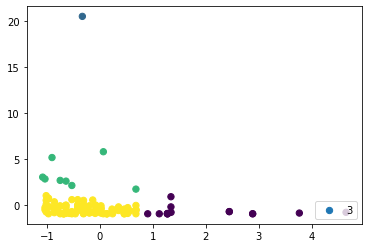

In [300]:
kmw2 = KMeans(
    n_clusters=4, init='random',
    n_init=10000, max_iter=10000, 
    tol=1e-06, random_state=None,
    algorithm='full'
)
w2y_km = kmw2.fit_predict(Xw)
dfc['kmw2_cluster'] = pd.Series(w2y_km, index=dfc.index)
plt.scatter(Xw[:, 0], Xw[:, 1], c=w2y_km, s=40, cmap='viridis')
plt.legend(w2y_km, loc=4)


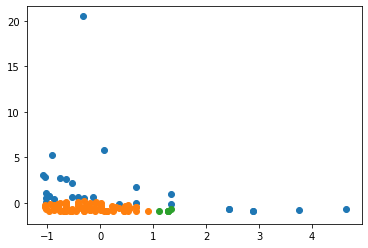

In [304]:
from sklearn.cluster import DBSCAN
from numpy import unique, where
from matplotlib import pyplot

# define the model
dbscan_model = DBSCAN(eps=0.25, min_samples=5)

# train the model
db_clust = dbscan_model.fit_predict(X)



dfc['db_clust'] = pd.Series(db_clust, index=dfc.index)
# get all of the unique clusters
dbscan_cluster = unique(db_clust)

# plot the DBSCAN clusters
for dbscan_cluster in dbscan_cluster:
    # get data points that fall in this cluster
    index = where(db_clust == dbscan_cluster)
    # make the plot
    pyplot.scatter(X[index, 0], X[index, 1])

# show the DBSCAN plot
pyplot.show()

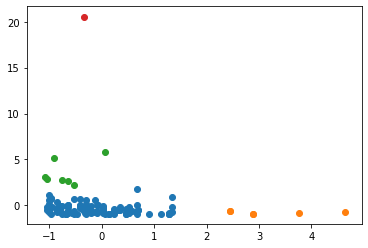

In [307]:
from sklearn.cluster import Birch

birch_model = Birch(threshold=0.03, n_clusters=4)
# train the model
birchy = birch_model.fit_predict(X)



dfc['birch'] = pd.Series(birchy, index=dfc.index)
# get all of the unique clusters
birch_cluster = unique(birchy)

# plot the DBSCAN clusters
for birch_cluster in birch_cluster:
    # get data points that fall in this cluster
    index = where(birchy == birch_cluster)
    # make the plot
    pyplot.scatter(X[index, 0], X[index, 1])

# show the DBSCAN plot
pyplot.show()

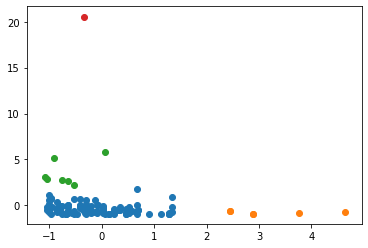

In [324]:
from sklearn.cluster import AgglomerativeClustering

AP =  AgglomerativeClustering(n_clusters=4)
Apm = AP.fit_predict(X)



dfc['Ag'] = pd.Series(Apm, index=dfc.index)
# get all of the unique clusters
Apm_cluster = unique(Apm)

# plot the DBSCAN clusters
for Apm_cluster in Apm_cluster:
    # get data points that fall in this cluster
    index = where(Apm == Apm_cluster)
    # make the plot
    pyplot.scatter(X[index, 0], X[index, 1])

# show the DBSCAN plot
pyplot.show()

## Finding best number of clusters

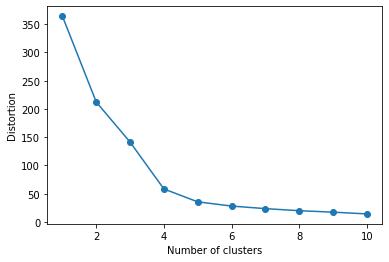

In [261]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(Xw)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [262]:
# 4 or 5

In [297]:


dfc.loc[dfc['kmw2_cluster']==3, 'kmw2_cluster'] = 1
dfc.loc[dfc['kmw2_cluster']==2, 'kmw2_cluster'] = 3
dfc.loc[dfc['kmw2_cluster']==1, 'kmw2_cluster'] = 2
dfc.loc[dfc['kmw2_cluster']==0, 'kmw2_cluster'] = 0



In [325]:
dfc.sort_values('TOTAL_SALES', ascending=False)

,remotekey,price,no_reviews,TOTAL_SALES,km_cluster,kmw_cluster,quants,cuts,kmw2_cluster,db_clust,birch,AP,Ag
39,5029976,539.99,544,18554,2,0,0,0,1,-1,3,3,3
40,9149364,219.99,96,8686,0,1,0,2,2,-1,2,2,2
117,8345169,199.99,101,6067,0,1,0,2,2,-1,2,2,2
27,8986494,299.99,33,6051,0,2,0,2,3,-1,0,0,0
28,7816204,719.99,171,5038,0,1,0,2,2,-1,2,2,2
113,8699035,399.99,90,4311,0,1,0,3,2,-1,2,2,2
118,8214537,279.99,155,4158,0,1,0,3,2,-1,2,2,2
128,7353066,349.99,92,4126,0,1,0,3,2,-1,2,2,2
10,8919928,229.99,26,3453,0,2,0,3,3,-1,0,0,0
20,8483935,449.99,0,3278,0,2,0,3,3,0,0,0,0


In [309]:
# dbscan clusters are quite nice, all high sales are -1 and all lowest sales are 1. 
# there are many points which lie in the middle as 0s. Perhaps multiple clustering could be combined

# birch is fucking good, the highest seller has a point of its own (3) and all the next top sellers have a point of their own
# most next top sellers are all 2s with a small bit of leakage
# there are few 1s, 0s dominate the lowest sellers but also leak into the top
# PROMISING

In [ ]:
# Been trying to get the cluster numbers to change to what the quants are...... not working ffs